In [1]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Add "%20" so url runs (https://predictiveindex.force.com/developers/s/API%20Guide)
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

606


In [4]:
# Set up query url with API key
url = "http://api.openweathermap.org/data/2.5/forecast?"

#Set lists to hold response info
names = []
clouds = []
countries = []
dates = []
humidity = []
lat = []
lon = []
temp = []
wind = []

#Set count logs for calls
count = 1

In [16]:
#API Call
print(f'Beginning Data Retrieval \n-----------------------------')

for city in cities:
    query_url = url + "appid=" + api_key + city + "&units=metric"
    response = requests.get(query_url)
    try:
        response = response.json()
        names.append(response["name"])
        clouds.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        city_response = response["name"]
        print(f"Processing Record {count} | {city_response}")
        
        count += 1
        
        time.sleep(1)
    except:
        print("City not found. Skipping...")
    continue

print(f'\n----------------------------- \n Data Retrieval Complete \n-----------------------------')

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...

----------------------------- 
 Data Retrieval Complete 
-----------------------------


In [6]:
#Convert raw data to dictionary, to dataframe
weather_data = {
    "City": names,
    "Cloudiness": clouds,
    "Country": countries,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed": wind
}

In [7]:
weather_py = pd.DataFrame(weather_data)

weather_py.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
weather_py.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [9]:
#Save to CSV
weather_py.to_csv("weather_data.csv")

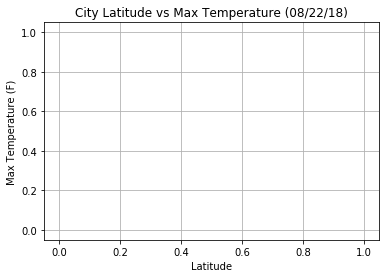

In [10]:
#Latitude vs. Temperature Plot
plt.scatter(weather_py["Lat"], weather_py["Max Temp"], s=10, marker='o', color='Coral', edgecolor='Black', alpha=0.75)
plt.title(f'City Latitude vs Max Temperature (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("../HW6/LatvTemp.png", bbox_inches='tight')
plt.show()

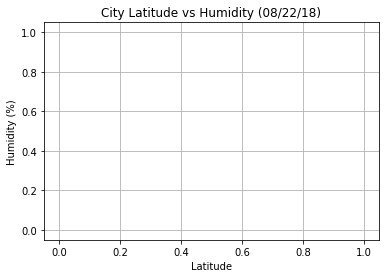

In [11]:
#Latitude vs. Humidity Plot
plt.scatter(weather_py["Lat"], weather_py["Humidity"], s=10, marker='o', color='Skyblue', edgecolor='Black', alpha=0.75)
plt.title(f'City Latitude vs Humidity (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("../HW6/LatvHum.png", bbox_inches='tight')
plt.show()

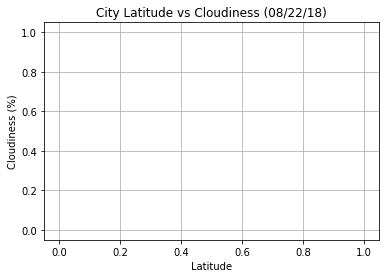

In [12]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_py["Lat"], weather_py["Cloudiness"], s=10, marker='o', color='Green', edgecolor='Black', alpha=0.75)
plt.title(f'City Latitude vs Cloudiness (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("../HW6/LatvClouds.png", bbox_inches='tight')
plt.show()               

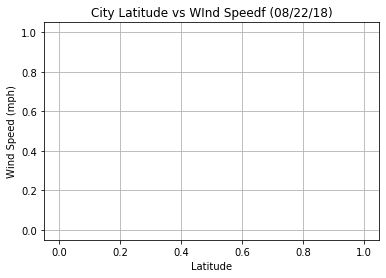

In [13]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_py["Lat"], weather_py["Wind Speed"], s=10, marker='o', color='Gold', edgecolor='Black', alpha=0.75)
plt.title(f'City Latitude vs WInd Speedf (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("../HW6/LatvWind.png", bbox_inches='tight')
plt.show() 